# Spectral Modelling

One of SpectralRadex's key features is the ability to generate model spectra from RADEX models. In this example, we show how to generate a spectrum.

In [1]:
import spectralradex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, we need a radex model. This is just a dictionary with the RADEX inputs as keys. For this example, we'll start by grabbing the default parameters from the radex wrapper. Then we'll increase the CO column density and the linewidth as well as setting fmax to 300 GHz.

In [2]:
radex_params=spectralradex.radex.get_default_parameters()

radex_params["cdmol"]=1e16
radex_params["p-h2"]=1e4
radex_params["o-h2"]=1e4

radex_params["linewidth"]=10
radex_params["fmax"]=300

print(radex_params)

{'molfile': 'co.dat', 'tkin': 30.0, 'tbg': 2.73, 'cdmol': 1e+16, 'h2': 100000.0, 'h': 0.0, 'e-': 0.0, 'p-h2': 10000.0, 'o-h2': 10000.0, 'h+': 0.0, 'linewidth': 10, 'fmin': 0.0, 'fmax': 300, 'geometry': 1}


We also need a list of frequencies over which we'd like the spectrum. Here, we'll generate a spectrum with a 5 MHz resolution between 80 and 300 GHz. Getting the model intensities is a simple function call which will return a pandas dataframe of Frequency and Intensity.

The intention of SpectralRadex is to model observations. Thus, the first two inputs to the spectral modelling function are intended to match some observations: the frequency bins you observed and the assume $V_{LSR}$ of the object.

In [3]:
frequencies=np.arange(80,300,0.005)
v0=0.0
spectrum=spectralradex.model_spectrum(frequencies,v0,radex_params)

/home/jon/.local/lib/python3.8/site-packages/spectralradex/__init__.py:178: RuntimeWarning: invalid value encountered in true_divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


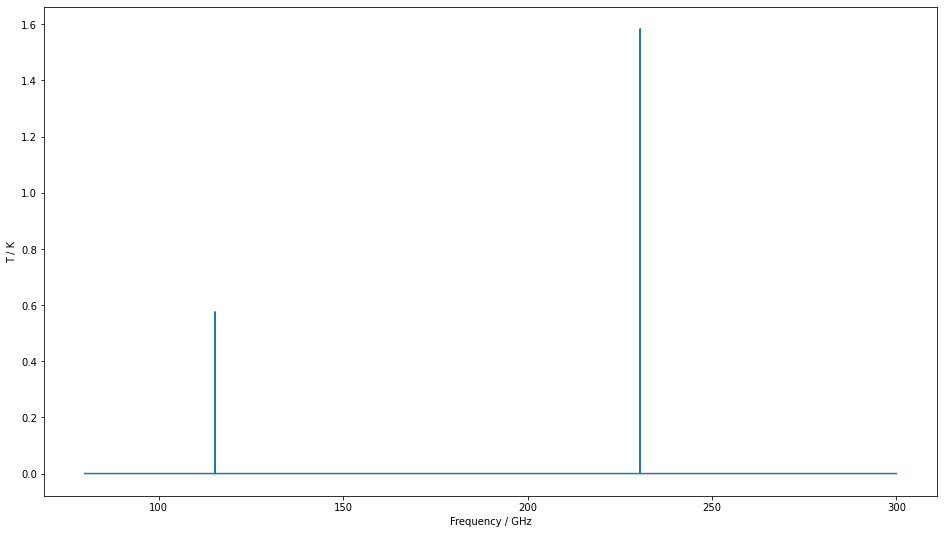

In [4]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(spectrum["Frequency"],spectrum["Intensity"],drawstyle="steps-mid")
settings=ax.set(xlabel="Frequency / GHz",ylabel="T / K")

The above example shows two extremely narrow peaks but if we increase the linewidth a little and zoom in, we can see the Gaussian shape we assume for all line in SpectralRadex.

/home/jon/.local/lib/python3.8/site-packages/spectralradex/__init__.py:178: RuntimeWarning: invalid value encountered in true_divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


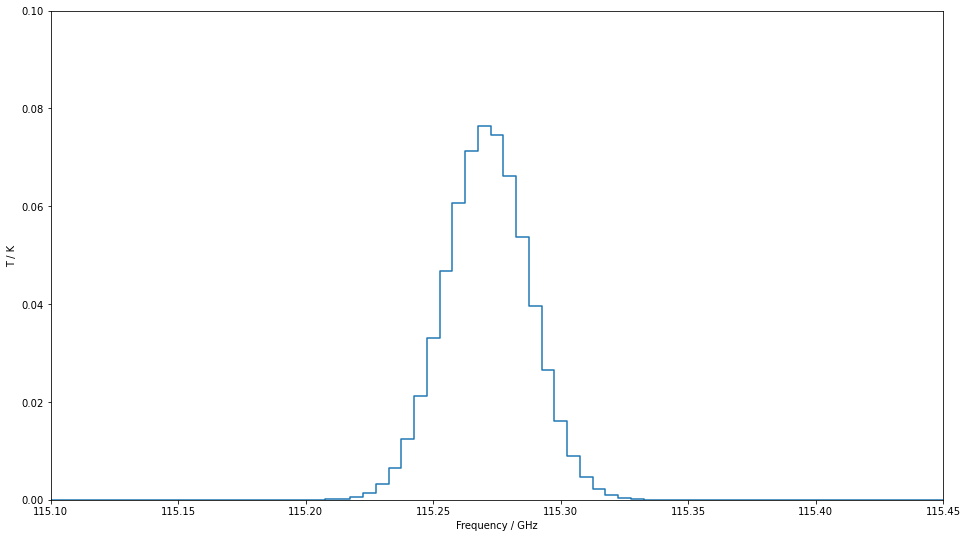

In [5]:
radex_params["linewidth"]=100
spectrum=spectralradex.model_spectrum(frequencies,v0,radex_params)
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(spectrum["Frequency"],spectrum["Intensity"],drawstyle="steps-mid")
settings=ax.set(xlim=(115.1,115.45),ylim=(0,0.1),xlabel="Frequency / GHz",ylabel="T / K")

Finally, please note that if you sample with too large a frequency bin, you'll miss lines. We are still considering what the default behaviour should be in this case. For now, SpectralRadex will warn you if the velocity bins are larger than the linewidth.

Here we repeat the above calculation with a 50 MHz frequency spacing.

/home/jon/.local/lib/python3.8/site-packages/spectralradex/__init__.py:178: RuntimeWarning: invalid value encountered in true_divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


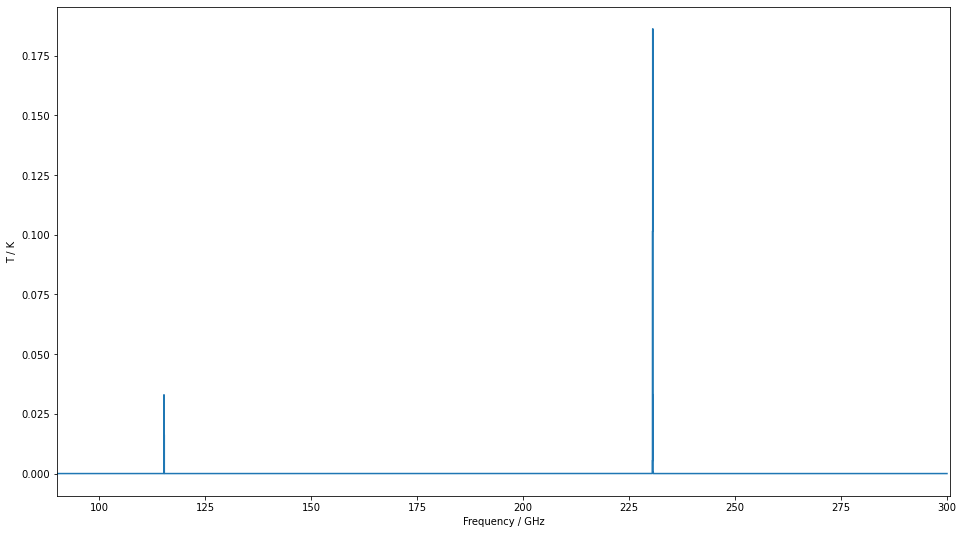

In [6]:
frequencies=np.arange(30,300,0.05)
v0=0.0
spectrum=spectralradex.model_spectrum(frequencies,v0,radex_params)
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(spectrum["Frequency"],spectrum["Intensity"],drawstyle="steps-mid")
settings=ax.set(xlim=(90,300.6),xlabel="Frequency / GHz",ylabel="T / K")